# Group analysis on searchlight maps from the FaceWord experiment

In the FaceWord experiment, participants looked at words and faces while undergoing fMRI.
P participantwe are presented with a word, which thewould y try to use to predict the emotionfon an upcoming emoji (happy/fearful). Their taswa is to respond wita h button press to indicate which type of emoji was presented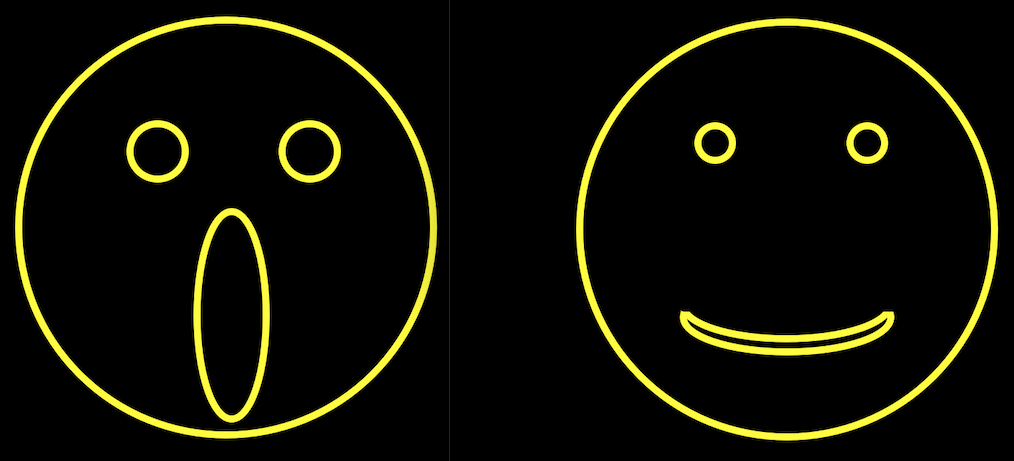

21 cognitive science students participated in the experiment over the course of several years (2019-202 as part of courses in cognitive neuroscience at Aarhus University3).

The experiment consisted of 6 sessions with 60 WordFace trials in ea (30 positive, 30 negative)ch. Each session lasted 10 minutes.

Each fMRI volume consisted of 45 slices (voxel-size: 2.53x2.53x3mm). Data was acquired with a TR=1s (1H, yielding a total of 600 images per sessionz The raw data can be found in the fMRI-data folder.

All data was preprocessed using fMRIprep.).

In this analysis, we have modelled the onsset foeverych positive and negative emojas an individual column in the design matrix, using the Glover HRF. The design matrix includes 22 nuisance variables and a cosine set for highpass filtering 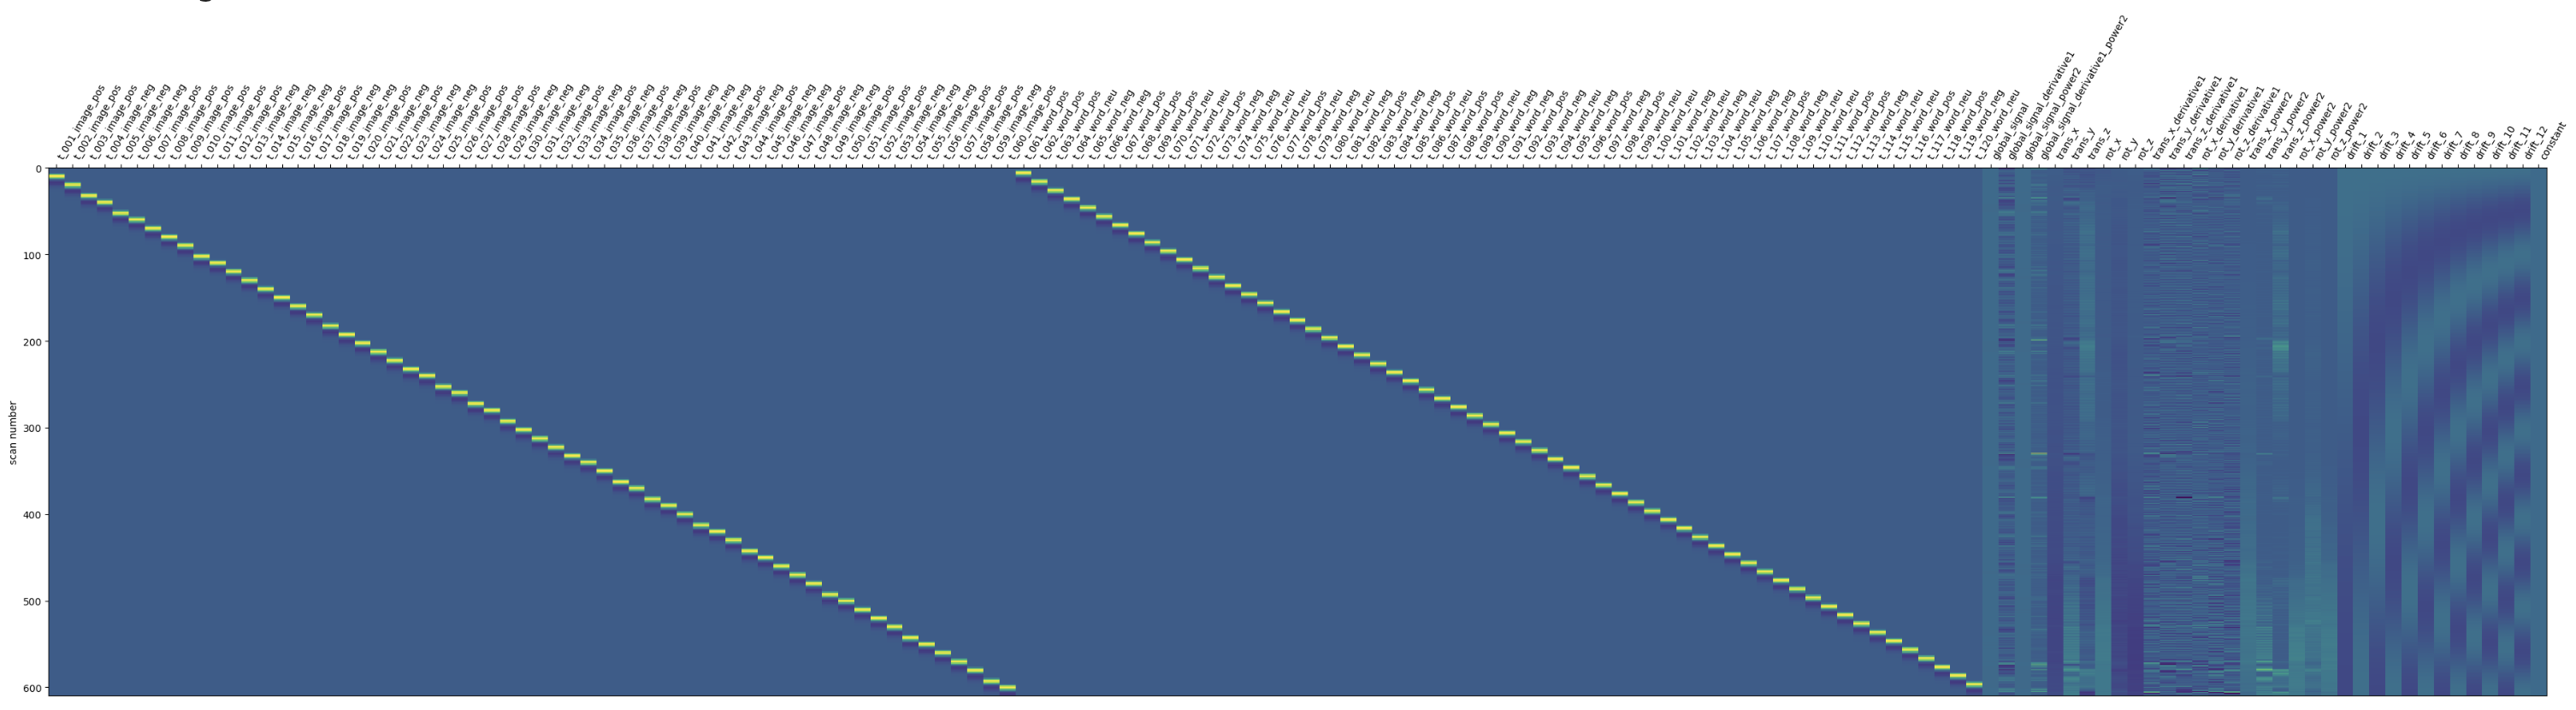

O our aim is to see if there is a difference between the t types of emojisz

To this end, we have conducted a searchlight analysis on 80% of the 360 trials. We now take the accuracy image for each participant and subject them to a 2nd level t-test.

#### Tasks and questions for assignment 5 are written at the bottom of the notebook.



<div class="alert alert-success" role="alert">

# Preamble: Activate environment
In the first notebook, we installed a python environment. If you haven't don so, please go back to the ```01_setup_virtual_environment.ipynb``` and complete this before proceeding.

If you closed/stopped the UCloud run between then and now, we will need to reactivate the environment.

For this we use a bash script with a subset of the lines we used for setting up the environment

The script called ```activate.sh``` This should be located in your working directory. If not, save the following in a file with this filename.

```bash
. /work/<MY DIRECTORY NUMBER>/virt_env/bin/activate
python -m ipykernel install --user --name=virt_env
echo Done! Remember changing the kernel in Jupyter.
```
</div>

In [1]:
import os
path='/work/798873' # Remember to change this to your own path
os.chdir(path)
!./activate.sh


Installed kernelspec virt_env in /home/coder/.local/share/jupyter/kernels/virt_env
Done! Remember changing the kernel in Jupyter.


<div class="alert alert-success" role="alert">
    
### Check that we are in the right environment

</div>

In [2]:
import sys
print(sys.executable)
#Check that we have something installed.
import nilearn


/work/julis_folder/notebooks/virt_env/bin/python


In [3]:
# Additional imports
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pickle
import pandas as pd
import nilearn
import sklearn

### Let's load the faceWord searchlight data from one participant

In [4]:
import pickle

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

f = open('/work/816119/FaceWordData/WordFace_searchlight_1.pkl', 'rb')
searchlight = pickle.load(f)
f.close()
print(searchlight)

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Starting cell: 17:11:53
SearchLight(cv=10, estimator=LinearSVC(dual='auto', max_iter=2000),
            mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f0e70483880>,
            n_jobs=-1,
            process_mask_img=<nibabel.nifti1.Nifti1Image object at 0x7f0e1bef8d60>,
            radius=5, verbose=10)
Finishing cell: 17:11:54


/work/julis_folder/notebooks/virt_env/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


### Plotting searchlight from one participant

Starting cell: 17:11:54
(193, 235, 198)


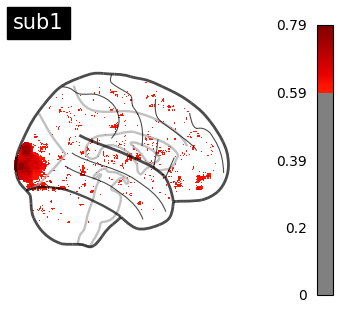

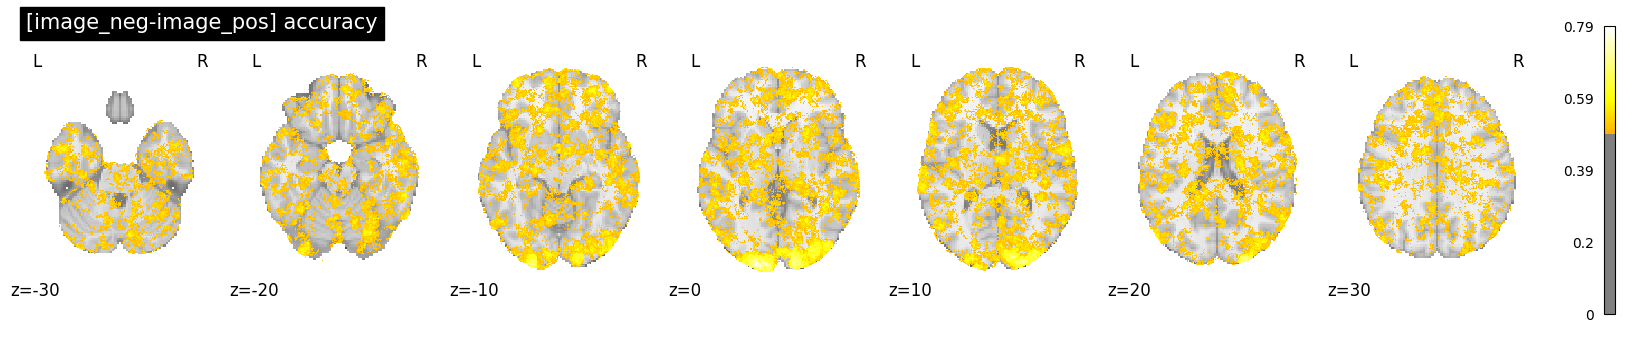

Finishing cell: 17:12:01


In [5]:
from nilearn.plotting import plot_glass_brain, plot_stat_map
from nilearn.image import new_img_like
import numpy as np

from nilearn import plotting
import matplotlib.pyplot as plt
mask_wb_filename='/work/816119/FaceWordData/BIDS/derivatives/sub-0054/anat/sub-0054_acq-T1sequence_run-1_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'

now = datetime.now()
print('Starting cell:',now.strftime("%H:%M:%S"))

searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
print(searchlight_img.shape)


plot_glass_brain(searchlight_img, cmap='jet',colorbar=True, threshold=0.6,
                              title=('sub1'),
                              plot_abs=False, display_mode='x')

   
#plt.suptitle('Classification accuracy (unc Acc>0.6)')
plt.show()

plot_stat_map(searchlight_img, cmap='cold_hot',threshold=0.5, cut_coords=[-30,-20,-10,0,10,20,30],
              display_mode='z',  black_bg=False,
              title='[image_neg-image_pos] accuracy')
plt.show()

# Saving the objects:
#f = open('/work/MikkelWallentin#6287/WordFace_first_level_models_all_trials_searchlight_all_par.pkl', 'wb')
#pickle.dump([searchlight_all, searchlight_img], f)
#f.close()

now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

## Load searchlight maps for each participant


In [6]:

from nilearn.image import new_img_like, math_img
N_par=21
searchlight_all= np.empty((N_par, 0)).tolist()
searchlight_all=[]
searchlight_demean=[]
conditions_label_all= np.empty((N_par, 0)).tolist()
for i in range(0,N_par):
    text = "Loading file %d\n" % (i+1)
    print(text)
    file_name='/work/816119/FaceWordData/WordFace_searchlight_'+str(i)+'.pkl'
    f = open(file_name, 'rb')
    searchlight = pickle.load(f)
    searchlight_img = new_img_like(mask_wb_filename, searchlight.scores_)
    searchlight_all.append(searchlight_img)
    searchlight_demean.append(math_img("(img1-0.5)*img2",img1=searchlight_img,img2=mask_wb_filename))
    
    #searchlight_all[i]=searchlight
    f.close()


print(searchlight_all[1])
            
now = datetime.now()
print('Finishing cell:',now.strftime("%H:%M:%S"))

Loading file 1



/work/julis_folder/notebooks/virt_env/lib/python3.9/site-packages/sklearn/base.py:348: InconsistentVersionWarning: Trying to unpickle estimator LinearSVC from version 1.3.0 when using version 1.3.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Loading file 2

Loading file 3

Loading file 4

Loading file 5

Loading file 6

Loading file 7

Loading file 8

Loading file 9

Loading file 10

Loading file 11

Loading file 12

Loading file 13

Loading file 14

Loading file 15

Loading file 16

Loading file 17

Loading file 18

Loading file 19

Loading file 20

Loading file 21


<class 'nibabel.nifti1.Nifti1Image'>
data shape (193, 235, 198)
affine:
[[   1.       0.       0.     -96.   ]
 [   0.       0.977    0.    -132.   ]
 [   0.       0.       0.977  -78.   ]
 [   0.       0.       0.       1.   ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 193 235 198   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float64
bitpix          : 64
slice_start     : 0
pixdim         

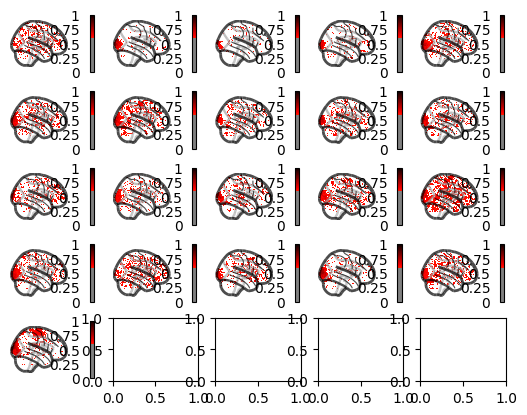

In [7]:
import matplotlib.pyplot as plt

from nilearn import plotting

#subjects = data["ext_vars"]["participant_id"].tolist()
fig, axes = plt.subplots(nrows=5, ncols=5)
for cidx, map in enumerate(searchlight_all):
    plotting.plot_glass_brain(
        map,
        colorbar=True,
        threshold=0.6,
        vmin=0.5,
        vmax=1,
        title=None,
        axes=axes[int(cidx / 5), int(cidx % 5)],
        plot_abs=False,
        display_mode="x",
    )
plt.show()

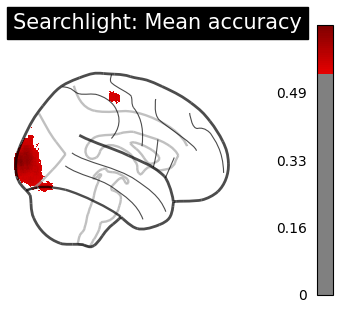

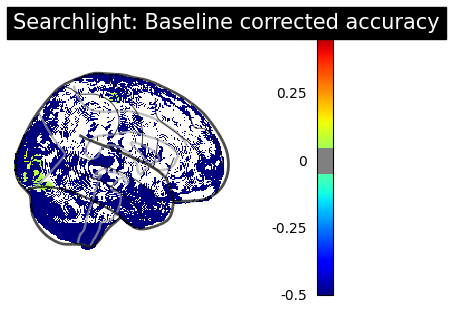

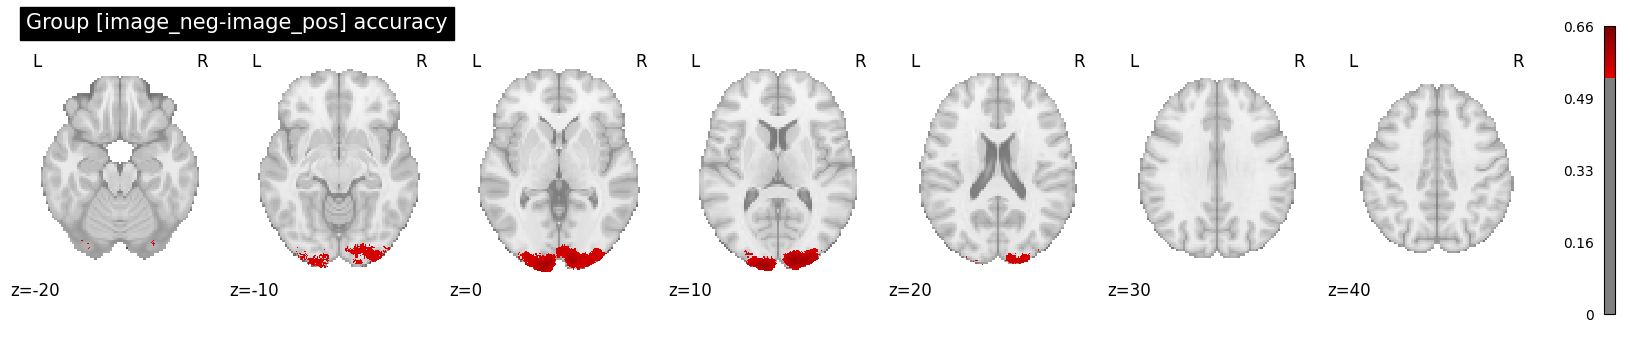

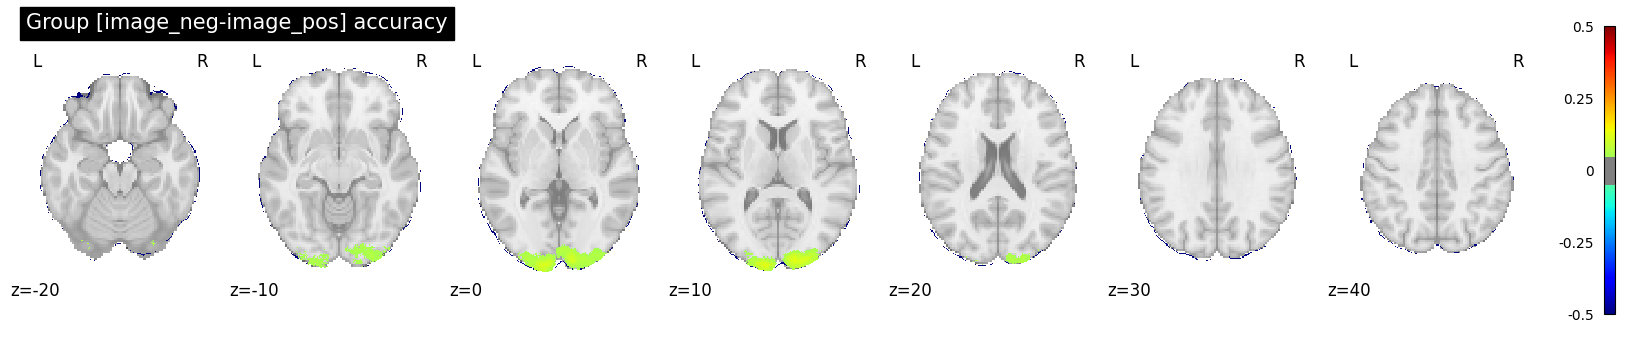

In [8]:
from nilearn.image import new_img_like,  mean_img, concat_imgs

#Concatenate beta maps
searchlight_conc=concat_imgs(searchlight_all)
# Make a mean image
searchlight_mean=mean_img(searchlight_conc)
#Concatenate baseline corrected maps
searchlight_conc_de=concat_imgs(searchlight_demean)
# Make a mean of the baseline-corrected image
searchlight_mean_demean=mean_img(searchlight_conc_de)

plot_glass_brain(searchlight_mean, cmap='jet',colorbar=True, threshold=0.55,
                              title=('Searchlight: Mean accuracy'),
                              plot_abs=False, display_mode='x')

plot_glass_brain(searchlight_mean_demean, cmap='jet',colorbar=True, threshold=0.05,vmin=0,
                              title=('Searchlight: Baseline corrected accuracy'),
                              plot_abs=False, display_mode='x')


plot_stat_map(searchlight_mean, cmap='jet',threshold=0.55, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()
plot_stat_map(searchlight_mean_demean, cmap='jet',threshold=0.05, cut_coords=[-20,-10,0,10,20,30,40],
              display_mode='z',  black_bg=False,
              title='Group [image_neg-image_pos] accuracy')
plt.show()

In [9]:
from nilearn.glm.second_level import SecondLevelModel
import pandas as pd

second_level_input = searchlight_demean
design_matrix = pd.DataFrame(
    [1] * len(second_level_input),
    columns=["intercept"],
)

second_level_model = SecondLevelModel(smoothing_fwhm=6.0, n_jobs=2)
second_level_model = second_level_model.fit(
    second_level_input,
    design_matrix=design_matrix,
)

z_map = second_level_model.compute_contrast(
    second_level_contrast="intercept",
    output_type="z_score",
)

/work/julis_folder/notebooks/virt_env/lib/python3.9/site-packages/nilearn/glm/_utils.py:346: RuntimeWarning: divide by zero encountered in divide
  return np.where(X <= 0, 0, 1.0 / X)


The p<0.001 threshold is 3.09
The FDR=.05 threshold is 2.61
The p<.05 Bonferroni-corrected threshold is 5.57


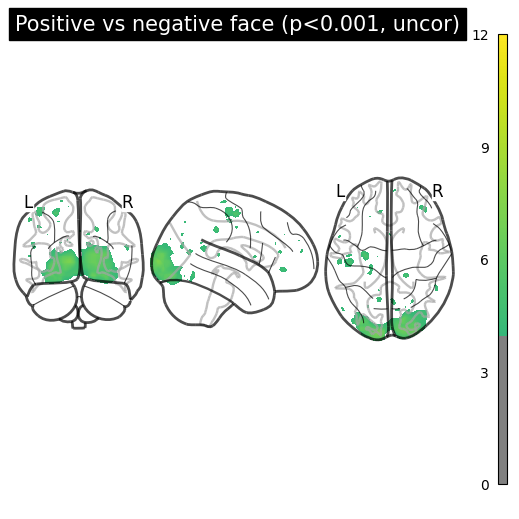

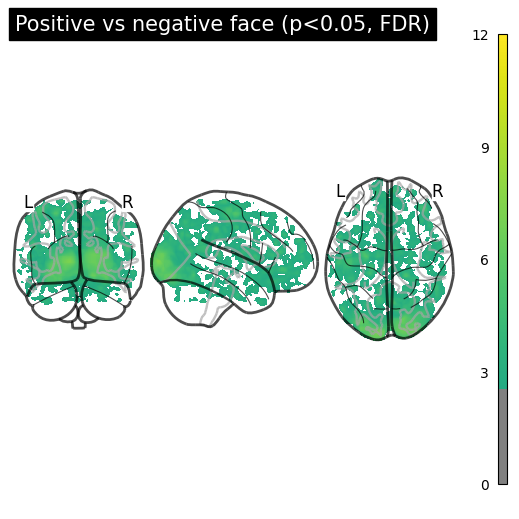

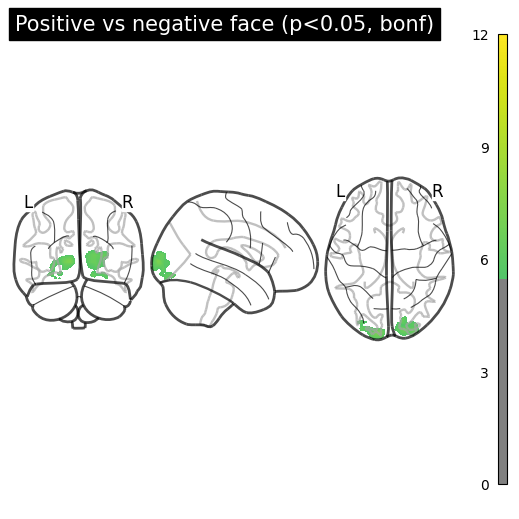

In [18]:
from scipy.stats import norm
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img

p_val = 0.001
p001_unc = norm.isf(p_val)
print(f"The p<0.001 threshold is {p001_unc:.3g}")

thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=0.05, height_control="fdr"
)
print(f"The FDR=.05 threshold is {threshold2:.3g}")

thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=0.05, height_control="bonferroni"
)
print(f"The p<.05 Bonferroni-corrected threshold is {threshold3:.3g}")

#Remove negative effects from image (they are meaningless)
z_map_disp=threshold_img(
    z_map,
    threshold=0,
    two_sided=False,
)

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=4,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="Positive vs negative face (p<0.001, uncor)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="viridis",
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold2,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="Positive vs negative face (p<0.05, FDR)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="viridis",
)
plotting.show()

display = plotting.plot_glass_brain(
    z_map_disp,
    threshold=threshold3,
    vmin=0,
    vmax=12,
    colorbar=True,
    symmetric_cbar=False,
    #display_mode="x",
    plot_abs=False,
    title="Positive vs negative face (p<0.05, bonf)",
    figure=plt.figure(figsize=(5, 5)),
    cmap="viridis",
)
plotting.show()

## Atlas reader

KeyboardInterrupt: 

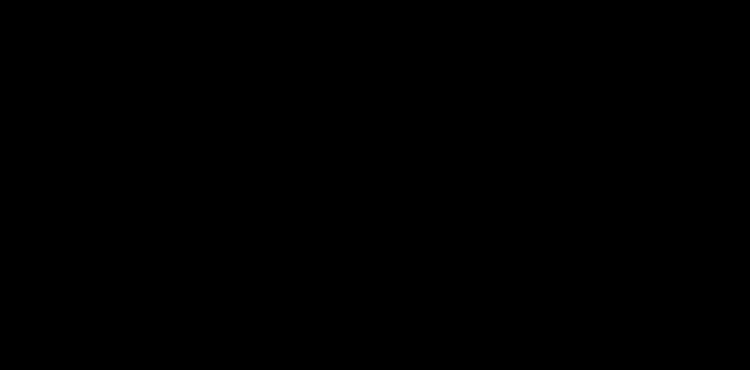

In [17]:
from atlasreader import create_output
create_output(z_map_disp, voxel_thresh=threshold3, cluster_extent=0, direction='both', outdir='/work/julis_folder/notebooks/atlasreader2/')
# Atlasreader automatically saves results to both .png-files and a csv-file. Look in your working directory.
#pd.read_csv('atlasreader_peaks.csv')